# <center> CLASIFICACIÓN DE IMÁGENES: CELEBRIDADES EN EL DEPORTE </center>

TABLA DE CONTENIDO

## 1. Librerías necesarias

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers,callbacks,models,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix


2023-07-05 20:00:56.349496: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 20:00:56.777304: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 20:00:56.778556: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 20:00:58.366147: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 2. Carga y visualización de datos

In [3]:
seed_value = 57 # 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

Para cargar los datos usaremos "image_dataset_from_directory", que genera un tf.data.Dataset a partir de imágenes en un directorio. <br> <br>
tf.data.Dataset tiene como finalidad trabajar con un conjunto potencialmente grande de elementos.

<br> 
Más info: <a href="https://keras.io/api/data_loading/image/" target='_blanck'> aquí</a>   


In [4]:
#data_dir = "archive\Sports-celebrity images"

data_dir = "archive/Sports-celebrity images"
img_size=256
batch_size=32

df=tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,
                                                       shuffle=True,
                                                       seed=seed_value,
                                                       image_size=(img_size,img_size),
                                                       batch_size=batch_size)


Found 441 files belonging to 4 classes.


Veamos alguno de los datos

In [5]:
for image_batch,label_batch in df.take(1):
    print(image_batch.shape)
    print(image_batch.numpy()[1])
    print(label_batch.numpy())


2023-07-05 20:01:02.288216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [441]
	 [[{{node Placeholder/_4}}]]
2023-07-05 20:01:02.288583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [441]
	 [[{{node Placeholder/_4}}]]


(32, 256, 256, 3)
[[[1.00092834e+02 7.30928345e+01 5.40928345e+01]
  [9.79140625e+01 7.09140625e+01 5.19140625e+01]
  [9.74765625e+01 7.04765625e+01 5.14765625e+01]
  ...
  [9.81452026e+01 7.41452026e+01 6.41452026e+01]
  [9.72785034e+01 7.42785034e+01 6.81066284e+01]
  [9.53046875e+01 7.43046875e+01 6.93046875e+01]]

 [[9.92187500e+01 7.22187500e+01 5.32187500e+01]
  [9.68355103e+01 6.98355103e+01 5.08355103e+01]
  [9.64356079e+01 6.94356079e+01 5.04356079e+01]
  ...
  [9.74356079e+01 7.34356079e+01 6.34356079e+01]
  [9.50073853e+01 7.20073853e+01 6.58355103e+01]
  [9.29140625e+01 7.20000000e+01 6.68281250e+01]]

 [[9.81594849e+01 7.11594849e+01 5.21594849e+01]
  [9.59140625e+01 6.89140625e+01 4.99140625e+01]
  [9.57505493e+01 6.87505493e+01 4.97505493e+01]
  ...
  [9.62494507e+01 7.22494507e+01 6.22494507e+01]
  [9.50000000e+01 7.20859375e+01 6.38281250e+01]
  [9.30000000e+01 7.30000000e+01 6.50468750e+01]]

 ...

 [[3.09765625e+01 3.34062500e+01 3.24062500e+01]
  [3.09765625e+01 3.3

Puede verse que:

- El tamaño del lote es 32, y tiene imágenes de 256x256x3 (imágenes a color de 256x256).
- Los valores de la imagen están entre 0 y 255
- Las etiquetas son numéricas (con valores entre 1 y 4)

Definimos entonces

In [6]:
channels=3
input_shape=(img_size,img_size,channels)


Veamos los nombres de las clases y obtengamos su largo:


In [7]:
classes=df.class_names
print(classes)

num_classes = len(classes)

['Kane Williamson', 'Kobe Bryant', 'Maria Sharapova', 'Ronaldo']


Finalmente imprimamos algunas imágenes:

2023-07-05 20:01:02.591027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [441]
	 [[{{node Placeholder/_4}}]]
2023-07-05 20:01:02.591748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [441]
	 [[{{node Placeholder/_4}}]]


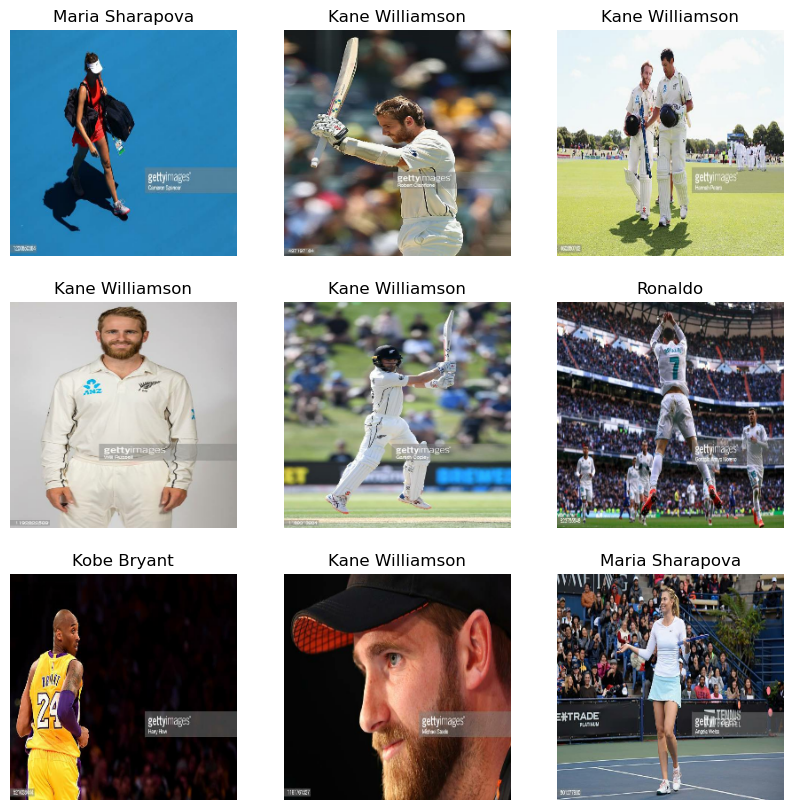

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in df.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes[label_batch[i]])
        plt.axis("off")



## 3. Pre-procesamiento de datos

### 3.1. División en conjuntos de entrenamiento, validación y test

In [9]:
def train_test_split(data,train_split=.7,val_split=.25,
                     test_split=.05,shuffle=True,shuffle_size=10000):
    
    data_size=len(data)
    if shuffle:
        data=data.shuffle(shuffle_size,seed=17)
        
    train_size=int(train_split*data_size)
    val_size=int(val_split*data_size)
    
    train_data=data.take(train_size)
    val_data=data.skip(train_size).take(val_size)
    test_data=data.skip(train_size).skip(val_size)
    
    return train_data,val_data,test_data


train_data,val_data,test_data=train_test_split(df)


### 3.2. Data Augmentation

Como el dataset no es demasiado grande realizaremos un aumento de datos, en el que le aplicaremos transformaciones realistas a las imágenes (como rotaciones, cambio de brillo....). Esto ayuda a exponer al modelo a diferentes aspectos del conjunto de entrenamiento mientras que reduce el overfitting.


In [10]:
# defino las transformaciones
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

# lo aplico
train_data = train_data.map(
    lambda x, y: (data_augmentation(x, training=True), y))


# para la performance
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


Veamos cómo luce la aplicación de estas transformaciones:

2023-07-05 20:01:09.304290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [441]
	 [[{{node Placeholder/_4}}]]
2023-07-05 20:01:09.304966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_25' with dtype resource
	 [[{{node Placeholder/_25}}]]


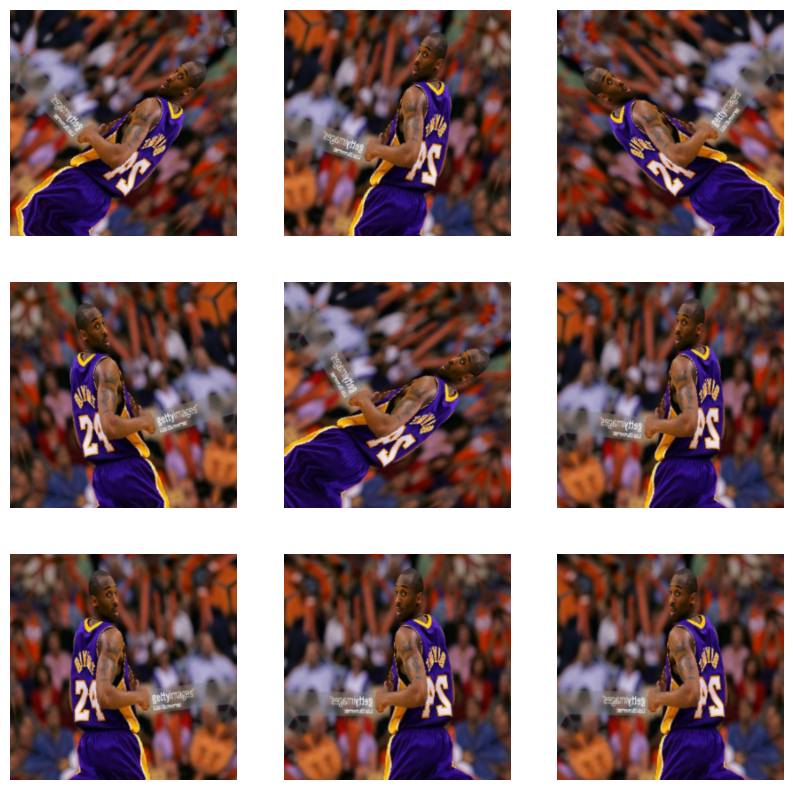

In [11]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


## 4. Modelo

Comenzaremos implementando el siguiente modelo:


IMAGEN..........................................


<b>Nota</b> Si bien es un modelo simple que puede implementarse con la API secuencial, se hará con la funcional para tener más praćtica.



In [48]:
def make_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # escalado
    x = layers.Rescaling(1.0 / 255)(inputs)
    
    # 1
    x = layers.Conv2D(64, 3, strides=2, padding="same",activation="relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # 2
    x = layers.Conv2D(64, 3, strides=2, padding="same",activation="relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2, strides=2, padding="same")(x)
    x = layers.Dropout(0.4)(x)
    
    # 3
    x = layers.Conv2D(64, 3, strides=2, padding="same",activation="relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2, strides=2, padding="same")(x)

    # 4
    x = layers.Conv2D(64, 3, strides=2, padding="same",activation="relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2, strides=2, padding="same")(x)
    x = layers.Dropout(0.4)(x)
    
    # 5
    x = layers.Conv2D(64, 3, strides=2, padding="same",activation="relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2, strides=2, padding="same")(x)
    
    # 6
    x = layers.Conv2D(64, 3, strides=2, padding="same",activation="relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2, strides=2, padding="same")(x)  
    x = layers.Dropout(0.4)(x)
    
    # aplano    
    x = layers.Flatten()(x)
    
    # dense y dropout
    x = layers.Dense(64,activation='relu')(x)
    #x = layers.Dropout(0.4)(x)

    
    # salida
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    return tf.keras.Model(inputs, outputs)

model = make_model(input_shape=input_shape, num_classes=num_classes)


Veamos la estructura de nuestro modelo:

In [36]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Compilamos y ajustamos, como callbacks usaremos EarlyStoppping (para reg....) y el que guarda....

In [49]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])


callbackss = [
    callbacks.EarlyStopping(monitor='val_loss', patience=15),
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras",save_best_only=True),
]

history=model.fit(
                  train_data, 
                  epochs=50, 
                  verbose=1,
                  batch_size=batch_size,
                  validation_data=val_data,
                  callbacks=callbackss)

Epoch 1/50
9/9 [==============================] - 6s 505ms/step - loss: 1.3871 - accuracy: 0.2465 - val_loss: 1.3829 - val_accuracy: 0.3021
Epoch 2/50
9/9 [==============================] - 4s 490ms/step - loss: 1.3858 - accuracy: 0.2674 - val_loss: 1.3780 - val_accuracy: 0.3021
Epoch 3/50
9/9 [==============================] - 4s 500ms/step - loss: 1.3808 - accuracy: 0.2743 - val_loss: 1.3661 - val_accuracy: 0.3021
Epoch 4/50
9/9 [==============================] - 5s 494ms/step - loss: 1.3679 - accuracy: 0.2743 - val_loss: 1.3609 - val_accuracy: 0.3021
Epoch 5/50
9/9 [==============================] - 4s 496ms/step - loss: 1.3722 - accuracy: 0.2812 - val_loss: 1.3525 - val_accuracy: 0.3125
Epoch 6/50
9/9 [==============================] - 4s 484ms/step - loss: 1.3434 - accuracy: 0.3194 - val_loss: 1.3723 - val_accuracy: 0.3646
Epoch 7/50
9/9 [==============================] - 4s 481ms/step - loss: 1.3281 - accuracy: 0.4097 - val_loss: 1.3040 - val_accuracy: 0.4271
Epoch 8/50
9/9 [====

In [50]:
scores=model.evaluate(test_data)

2/2 [==============================] - 0s 117ms/step - loss: 1.3584 - accuracy: 0.5312


La performance no es muy buena, tendremos que ajustar el modelo.

Grafiquemos para ver la situación con un poco más de detalle:

Text(0.5, 1.0, 'Training and Validation Loss')

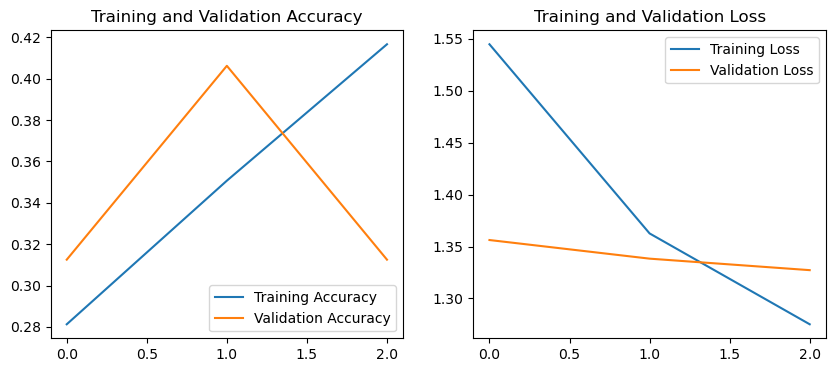

In [20]:
history.params["epochs"]=3
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

plt.plot(range(history.params["epochs"]),
         history.history["accuracy"],
         label="Training Accuracy")

plt.plot(range(history.params["epochs"]),
         history.history["val_accuracy"],
         label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)

plt.plot(range(history.params["epochs"]),
         history.history["loss"],
         label="Training Loss")

plt.plot(range(history.params["epochs"]),
         history.history["val_loss"],
         label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

Veamos también la matriz de confusión:

1/1 [==============================] - 0s 154ms/step


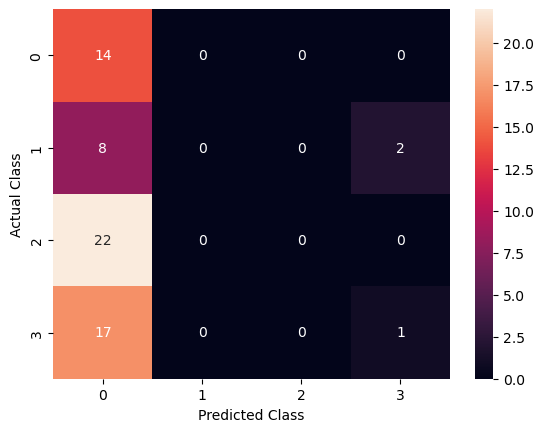

In [21]:
#https://stackoverflow.com/questions/70775762/how-to-make-a-confusion-matrix-with-keras


#y_prediction = model.predict(x_test)
#y_prediction = np.argmax (y_prediction, axis = 1)
#y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
#result = confusion_matrix(y_test, y_prediction , normalize='pred')




actual_list=[]
pred_list=[]
for X_batch, y_batch in test_data:
    y_batch=y_batch.numpy().tolist()
    y_pred = model.predict(X_batch)
    for i in y_batch:
        actual_list.append(i)
    for j in y_pred:
        pred_list.append(np.argmax(j,axis=-1).tolist())


cm = confusion_matrix(actual_list, pred_list)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()



## 5. Ajuste de hiperparámetros

Veamos un poco lo que podemos modificar:

- Algoritmo de optimización
- Tasa de aprendizaje
- Número de capas
- Cantidad de unidades en cada capa
- Kernel size
- Pool size
- Dropout rate
- Cantidad de epochs
- Arquitectura de la red



Hay distintos métodos para intentar el ajuste, entre ellos:
    
- GridSearch
- RandomSearch

También hay herramientas que ayudan que con esta tarea, como por ejemplo: 

<a href="https://keras.io/keras_tuner/">Keras Tuner </a>

Aquí haremos pruebas simples, comenzaremos por probar con diferentes tasas de aprendizaje y luego iremos viendo.
Se hará primero a mano para aprender y luego se utilizará Keras Tuner.

In [22]:
def make_model(input_shape, num_classes,units,dropout_rate):
    inputs = tf.keras.Input(shape=input_shape)

    # escalado
    x = layers.Rescaling(1.0 / 255)(inputs)
    
    x = layers.Conv2D(units, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)    
    x = layers.Dropout(dropout_rate)(x)
    
    
    x = layers.Conv2D(units, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
    x = layers.Dropout(dropout_rate)(x)
    
    
    x = layers.Conv2D(units, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.AveragePooling2D(3, strides=2, padding="same")(x)  
    x = layers.Dropout(dropout_rate)(x)
    
    # aplano    
    x = layers.Flatten()(x)
    
    # dense y dropout
    x = layers.Dense(units,activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    
    # salida
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    return tf.keras.Model(inputs, outputs)




In [23]:
optimizers = ['adam']
units = [64, 128]
dropout_rate = [0.2,0.4,0.5]
lrs = [0.001,0.0001]

# dsp. ahgrgar learning rate

In [24]:

results = []



for o in optimizers:
    for u in units:
        for d in dropout_rate:
            for lr in lrs:
            
                model = make_model(input_shape, num_classes, u,d)


                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), # 0.001 es default
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=["accuracy"])

                callbackss = [
                    callbacks.EarlyStopping(monitor='val_loss', patience=20),
                ]

                history=model.fit(
                      train_data, 
                      epochs=2, 
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=val_data,
                      callbacks=callbackss)

                scores=model.evaluate(test_data)


                results.append(
                    {
                        'params':
                        {
                            "optimizer":o,
                            "units":u,
                            "dropout_rate":d
                        },
                        'accuracy':str(scores[1])
                    }
                )


            
            
results

Epoch 1/2
9/9 [==============================] - 10s 901ms/step - loss: 1.4820 - accuracy: 0.3785 - val_loss: 1.3586 - val_accuracy: 0.3542
Epoch 2/2
2/2 [==============================] - 0s 169ms/step - loss: 1.3456 - accuracy: 0.3750
Epoch 1/2
9/9 [==============================] - 9s 906ms/step - loss: 1.4755 - accuracy: 0.3021 - val_loss: 1.3817 - val_accuracy: 0.3021
Epoch 2/2
2/2 [==============================] - 0s 189ms/step - loss: 1.3861 - accuracy: 0.3438
Epoch 1/2
9/9 [==============================] - 10s 929ms/step - loss: 1.5137 - accuracy: 0.2500 - val_loss: 1.3488 - val_accuracy: 0.3021
Epoch 2/2
2/2 [==============================] - 0s 177ms/step - loss: 1.3632 - accuracy: 0.2188
Epoch 1/2
9/9 [==============================] - 9s 880ms/step - loss: 1.6242 - accuracy: 0.2361 - val_loss: 1.3809 - val_accuracy: 0.2812
Epoch 2/2
2/2 [==============================] - 0s 180ms/step - loss: 1.3804 - accuracy: 0.2188
Epoch 1/2
9/9 [==============================] - 9s 94

2023-07-05 20:05:14.028797: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2023-07-05 20:05:14.105629: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2023-07-05 20:05:14.786596: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2023-07-05 20:05:16.660217: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.


1/9 [==>...........................] - ETA: 33s - loss: 1.7072 - accuracy: 0.2188

2023-07-05 20:05:17.166879: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.


9/9 [==============================] - 19s 2s/step - loss: 1.6480 - accuracy: 0.3472 - val_loss: 1.3506 - val_accuracy: 0.2812
Epoch 2/2
2/2 [==============================] - 1s 346ms/step - loss: 1.3570 - accuracy: 0.2344
Epoch 1/2
9/9 [==============================] - 17s 2s/step - loss: 1.4516 - accuracy: 0.2674 - val_loss: 1.3679 - val_accuracy: 0.3021
Epoch 2/2
2/2 [==============================] - 1s 342ms/step - loss: 1.3585 - accuracy: 0.3125
Epoch 1/2
9/9 [==============================] - 17s 2s/step - loss: 1.6329 - accuracy: 0.2812 - val_loss: 1.3470 - val_accuracy: 0.3021
Epoch 2/2
2/2 [==============================] - 1s 479ms/step - loss: 1.4336 - accuracy: 0.2188
Epoch 1/2
9/9 [==============================] - 17s 2s/step - loss: 1.6007 - accuracy: 0.2917 - val_loss: 1.3766 - val_accuracy: 0.3229
Epoch 2/2
2/2 [==============================] - 1s 351ms/step - loss: 1.3690 - accuracy: 0.2188
Epoch 1/2
9/9 [==============================] - 16s 2s/step - loss: 1.753

[{'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.2},
  'accuracy': '0.375'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.2},
  'accuracy': '0.34375'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.4},
  'accuracy': '0.21875'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.4},
  'accuracy': '0.21875'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.5},
  'accuracy': '0.234375'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.5},
  'accuracy': '0.328125'},
 {'params': {'optimizer': 'adam', 'units': 128, 'dropout_rate': 0.2},
  'accuracy': '0.234375'},
 {'params': {'optimizer': 'adam', 'units': 128, 'dropout_rate': 0.2},
  'accuracy': '0.3125'},
 {'params': {'optimizer': 'adam', 'units': 128, 'dropout_rate': 0.4},
  'accuracy': '0.21875'},
 {'params': {'optimizer': 'adam', 'units': 128, 'dropout_rate': 0.4},
  'accuracy': '0.21875'},
 {'params': {'optimizer': 'adam', 'units': 128

In [25]:
results

[{'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.2},
  'accuracy': '0.375'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.2},
  'accuracy': '0.34375'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.4},
  'accuracy': '0.21875'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.4},
  'accuracy': '0.21875'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.5},
  'accuracy': '0.234375'},
 {'params': {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.5},
  'accuracy': '0.328125'},
 {'params': {'optimizer': 'adam', 'units': 128, 'dropout_rate': 0.2},
  'accuracy': '0.234375'},
 {'params': {'optimizer': 'adam', 'units': 128, 'dropout_rate': 0.2},
  'accuracy': '0.3125'},
 {'params': {'optimizer': 'adam', 'units': 128, 'dropout_rate': 0.4},
  'accuracy': '0.21875'},
 {'params': {'optimizer': 'adam', 'units': 128, 'dropout_rate': 0.4},
  'accuracy': '0.21875'},
 {'params': {'optimizer': 'adam', 'units': 128

## 6. Predicciones con el modelo final

In [41]:
def create_model(optimizer='adam', units=64, dropout_rate=0.4, input_shape=input_shape):
   
        inputs = keras.Input(shape=input_shape)
        x = layers.Rescaling(1.0 / 255)(inputs)


        x = layers.Conv2D(units, 3, strides=2, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
        x = layers.Dropout(dropout_rate)(x)
        #
        x = layers.Conv2D(units, 3, strides=2, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
        x = layers.Dropout(dropout_rate)(x)
        #
        x = layers.Conv2D(units, 3, strides=2, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.AveragePooling2D(3, strides=2, padding="same")(x) 
        x = layers.Dropout(dropout_rate)(x)
        #
        x = layers.Flatten()(x)
        x = layers.Dense(units,activation='relu')(x)
        #
        x = layers.Dropout(dropout_rate)(x)

        outputs = layers.Dense(num_classes, activation="softmax")(x)
        
        #
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        # cambio de optimizador y learning rate
        if optimizer=="Adam":
            opt = Adam(lr=lrn_rate)
        elif optimizer=="SGD":
            opt = keras.optimizers.SGD(learning_rate=lrn_rate)

        model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=["accuracy"])
        #
        return model

In [45]:

##https://pub.towardsai.net/keras-tuner-tutorial-hyperparameter-optimization-tensorflow-keras-computer-vision-example-c9abbdad9887


"""
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    
    x = inputs
    
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
    # dropout, sin batch norm
    
    
    x = layers.Dropout(0.4)(x)
    
    
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
    
    
    x = layers.Dropout(0.4)(x) # nuevo
    
    
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.AveragePooling2D(3, strides=2, padding="same")(x) 
    
    
    x = layers.Dropout(0.4)(x)
    
    
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    
    x = layers.Flatten()(x)
    
    x = layers.Dense(64,activation='relu')(x)
    
    #
    x = layers.Dropout(0.4)(x) # sin esto no anda mal pero el modelo tiene overfitting
    
    outputs = layers.Dense(units, activation=activation)(x)
    
    return keras.Model(inputs, outputs)
    
"""

'\ndef make_model(input_shape, num_classes):\n    inputs = keras.Input(shape=input_shape)\n\n    # Entry block\n    x = layers.Rescaling(1.0 / 255)(inputs)\n    \n    x = inputs\n    \n    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)\n    x = layers.BatchNormalization()(x)\n    x = layers.Activation("relu")(x)\n    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)\n    # dropout, sin batch norm\n    \n    \n    x = layers.Dropout(0.4)(x)\n    \n    \n    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)\n    x = layers.BatchNormalization()(x)\n    x = layers.Activation("relu")(x)\n    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)\n    \n    \n    x = layers.Dropout(0.4)(x) # nuevo\n    \n    \n    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)\n    x = layers.BatchNormalization()(x)\n    x = layers.Activation("relu")(x)\n    x = layers.AveragePooling2D(3, strides=2, padding="same")(x) \n    \n    \n    x = layers.Dropout(0.4)(x)\n    \n    \n   